<a href="https://colab.research.google.com/github/Fenrir1106/image-classification-using-CNN/blob/main/tugasANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.datasets import cifar10

#load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#data preprocessing
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]

#make the model
model = Sequential()

#make the first layer of the model (convolutional layer)
model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(Activation('relu'))

#make the second layer to prevent overfitting
model.add(Dropout(0.2))

#create the third layer for batch normalization
model.add(BatchNormalization())

#create another convolutional layer
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

#create the pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

#repeat the layer above
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

#create another layer to flatten the data
model.add(Flatten())
model.add(Dropout(0.2))

#create the dense layer
model.add(Dense(256, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
    
model.add(Dense(128, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

#create the final layer
model.add(Dense(class_num))
model.add(Activation('softmax'))

#set the epoch to 10
epochs = 10
optimizer = 'adam'

#compile the model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

#print the model summary
#print(model.summary())

#create a random seed
seed = 17

#train the model
np.random.seed(seed)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)

Epoch 1/10
782/782 [==============================] - 12s 14ms/step - loss: 1.7282 - accuracy: 0.4073 - val_loss: 1.3487 - val_accuracy: 0.5311
Epoch 2/10
782/782 [==============================] - 11s 14ms/step - loss: 0.9856 - accuracy: 0.6505 - val_loss: 0.8533 - val_accuracy: 0.7000
Epoch 3/10
782/782 [==============================] - 11s 14ms/step - loss: 0.8162 - accuracy: 0.7147 - val_loss: 0.8464 - val_accuracy: 0.6996
Epoch 4/10
782/782 [==============================] - 11s 14ms/step - loss: 0.7553 - accuracy: 0.7369 - val_loss: 0.7498 - val_accuracy: 0.7355
Epoch 5/10
782/782 [==============================] - 11s 14ms/step - loss: 0.7228 - accuracy: 0.7457 - val_loss: 0.7450 - val_accuracy: 0.7385
Epoch 6/10
782/782 [==============================] - 11s 14ms/step - loss: 0.6966 - accuracy: 0.7568 - val_loss: 0.7157 - val_accuracy: 0.7490
Epoch 7/10
782/782 [==============================] - 11s 14ms/step - loss: 0.6711 - accuracy: 0.7645 - val_loss: 0.6935 - val_accuracy:

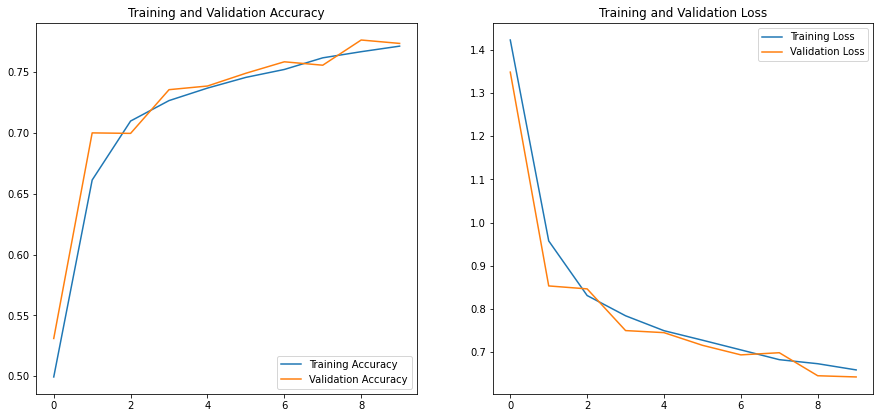

In [9]:
#draw the training result
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [10]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 77.35%
